In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
# import os
# current_directory=os.getcwd()
# print(current_directory)
df=pd.DataFrame()
df=pd.read_csv('/content/drive/My Drive/titanic.csv')
df['Age'].isna().value_counts()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,count
Age,
False,714
True,177


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Drop rows where 'Embarked' is missing as it's essential
df.dropna(subset=['Embarked'], inplace=True)
df.head(10)
# Fill missing 'Age' values using padding (forward fill)
df['Age'].ffill(inplace=True)
df.head(10)
# Fill remaining missing 'Age' values using backfill
df['Age'].bfill(inplace=True)
df.tail(10)
# Normalize 'Age' column
scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df['Age'].values.reshape(-1, 1))
df.head(20)
# Remove outliers in 'Age' column
df = df[df['Age'] <= 2.2]
df.head(20)

<ipython-input-22-1a196074efb1>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].ffill(inplace=True)
<ipython-input-22-1a196074efb1>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,0.434531,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,0.673285,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,0.019854,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0.334004,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,0.170646,1,0,237736,30.0708,NaN,C


In [ ]:
# Fill missing 'Cabin' values using nearest neighbors (if applicable), fill with the most frequent value in 'Cabin'
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,8.0500,B96 B98,S
5,6,0,3,"Moran, Mr. James",male,0.434531,0,0,330877,8.4583,B96 B98,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,0.673285,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,0.019854,3,1,349909,21.0750,B96 B98,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0.334004,0,2,347742,11.1333,B96 B98,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,0.170646,1,0,237736,30.0708,B96 B98,C


In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Fare'
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from 'Fare'
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,7.2500,B96 B98,S
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,8.0500,B96 B98,S
5,6,0,3,"Moran, Mr. James",male,0.434531,0,0,330877,8.4583,B96 B98,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,0.673285,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,0.019854,3,1,349909,21.0750,B96 B98,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0.334004,0,2,347742,11.1333,B96 B98,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,0.170646,1,0,237736,30.0708,B96 B98,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,0.044986,1,1,PP 9549,16.7000,G6,S


In [ ]:
# Encode 'Sex' using label encoding (0 for female, 1 for male)
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

# One-hot encode 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,0.271174,1,0,A/5 21171,7.2500,B96 B98,False,True
2,3,1,3,"Heikkinen, Miss. Laina",0,0.321438,0,0,STON/O2. 3101282,7.9250,B96 B98,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.434531,1,0,113803,53.1000,C123,False,True
4,5,0,3,"Allen, Mr. William Henry",1,0.434531,0,0,373450,8.0500,B96 B98,False,True
5,6,0,3,"Moran, Mr. James",1,0.434531,0,0,330877,8.4583,B96 B98,True,False
6,7,0,1,"McCarthy, Mr. Timothy J",1,0.673285,0,0,17463,51.8625,E46,False,True
7,8,0,3,"Palsson, Master. Gosta Leonard",1,0.019854,3,1,349909,21.0750,B96 B98,False,True
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,0.334004,0,2,347742,11.1333,B96 B98,False,True
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,0.170646,1,0,237736,30.0708,B96 B98,False,False
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,0.044986,1,1,PP 9549,16.7000,G6,False,True


<Axes: xlabel='Age'>

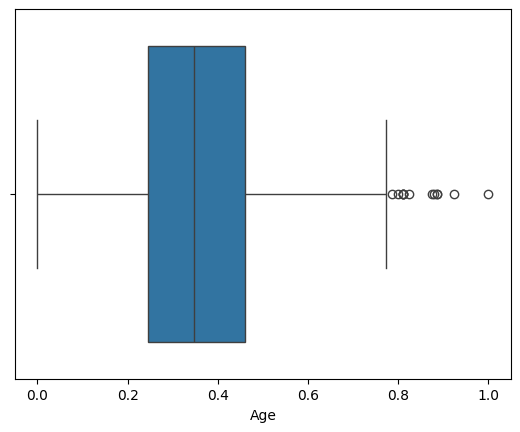

In [ ]:
import seaborn as sns
sns.boxplot(x=df['Age'])

In [ ]:
# Save the cleaned dataset
df.to_csv('titanic_cleaned.csv', index=False)
df = pd.read_csv('titanic_cleaned.csv')
# show no.of false and true
df['Age'].isna().value_counts()

,count
Age,
False,750
